In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train_tim_12.1.csv', index_col=0)

In [4]:
train.shape

(51684, 110)

In [3]:
test = pd.read_csv('test_tim_12.1.csv', index_col=0)

In [5]:
train_data = train.iloc[:, 0:108]
train_readmitted = train.iloc[:, 109]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_readmitted, test_size=0.2, random_state=0)

In [7]:
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

In [8]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

In [9]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("Training error: " + str(1-tree_model.score(X_train, y_train)))
print("Test error: " + str(1-tree_model.score(X_test, y_test)))

Training error: 2.4185551551481055e-05
Test error: 0.257811744219793


In [10]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
get_error(X_train, y_train, X_test, y_test, tree_model)

The training error is: 0.00002
The test     error is: 0.25830


[2.4185551551481055e-05, 0.25829544355228795]

In [11]:
grid_para_tree = [
    {'max_depth': range(1, 31)}
]

tree_model.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': range(1, 31)}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [12]:
test_error_range  = [1 - x for x in grid_search_tree.cv_results_['mean_test_score']]
train_error_range = [1 - x for x in grid_search_tree.cv_results_['mean_train_score']]

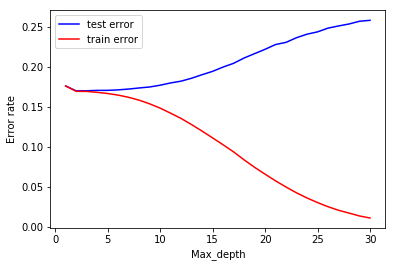

In [13]:
# plot error rates by max_depth values
plt.plot(range(1,31), test_error_range,
        c='blue', label='test error')
plt.plot(range(1,31), train_error_range,
        c='red', label='train error')
plt.xlabel('Max_depth')
plt.ylabel('Error rate')
plt.legend()
plt.show()

# The plot below indicates depth = 5 results in the lowest test error

Text(0.5,0,'depth')

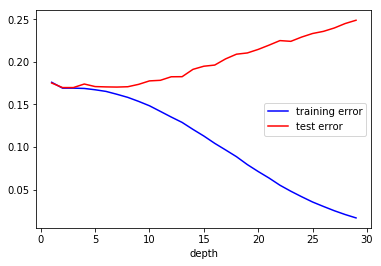

In [14]:
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = i)
    error = get_error(X_train, y_train, X_test, y_test, tree_model, show=False)
    tree_train.append(error[0])
    tree_test.append(error[1])


plt.plot(depth, tree_train, c = 'blue', label='training error')
plt.plot(depth, tree_test, c = 'red', label='test error')
plt.legend(loc=7)
plt.xlabel('depth')

In [15]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy').fit(X_train, y_train)
print('The best score is %.4f' %grid_search_tree.best_score_)
print('The training error is %.4f' %(1 - grid_search_tree.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_tree.best_estimator_.score(X_test, y_test)))

The best score is 0.8301
The training error is 0.1691
The testing error is 0.1698


In [16]:
print('Best parameters: '+ str(grid_search_tree.best_params_))

Best parameters: {'criterion': 'gini', 'max_depth': 2}


In [18]:
tree_final = grid_search_tree.best_estimator_
feature_importance = list(zip(train.columns[0:108], tree_final.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype = dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
feature_sort

array([(b'number_inp', 1.), (b'time_in_ho', 0.), (b'rosiglitaz', 0.),
       (b'rosiglitaz', 0.), (b'rosiglitaz', 0.), (b'repaglinid', 0.),
       (b'repaglinid', 0.), (b'repaglinid', 0.), (b'race_Hispa', 0.),
       (b'race_Cauca', 0.), (b'race_Asian', 0.), (b'race_Afric', 0.),
       (b'pioglitazo', 0.), (b'pioglitazo', 0.), (b'pioglitazo', 0.),
       (b'number_out', 0.), (b'number_eme', 0.), (b'number_dia', 0.),
       (b'num_proced', 0.), (b'num_medica', 0.), (b'num_lab_pr', 0.),
       (b'metformin_', 0.), (b'metformin_', 0.), (b'metformin_', 0.),
       (b'medical_sp', 0.), (b'medical_sp', 0.), (b'medical_sp', 0.),
       (b'medical_sp', 0.), (b'medical_sp', 0.), (b'medical_sp', 0.),
       (b'medical_sp', 0.), (b'medical_sp', 0.), (b'medical_sp', 0.),
       (b'medical_sp', 0.), (b'medical_sp', 0.), (b'medical_sp', 0.),
       (b'medical_sp', 0.), (b'medical_sp', 0.), (b'medical_sp', 0.),
       (b'max_glu_se', 0.), (b'max_glu_se', 0.), (b'max_glu_se', 0.),
       (b'max_glu_se

<BarContainer object of 108 artists>

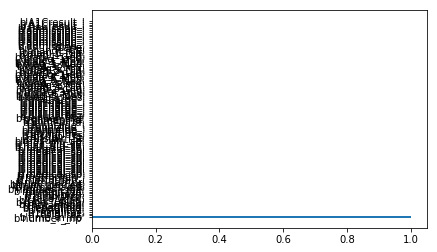

In [19]:
featureNames, featureScores = zip(*list(feature_sort))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)

In [20]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

# fit RF model on training set
randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

/Users/timothywaterman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The training error is: 0.02024
The test     error is: 0.17520


In [23]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 4),
    'n_estimators': range(10, 110, 10)
}

In [24]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 21.2 s, sys: 663 ms, total: 21.8 s
Wall time: 1min 14s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 4), 'n_estimators': range(10, 110, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
grid_search_forest.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}

In [27]:
grid_search_forest.best_score_

0.8240259269112632